### 목표 설정
- 특성변수를 활용해서 예측을 진행해보자
- 특성곱이라는 특성공학을 진행해보자

In [33]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
# 데이터셋 가져오기
from sklearn.datasets import load_boston

In [34]:
bst = load_boston()

In [35]:
bst.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [36]:
print(bst.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 데이터 정보 정리하기
*** 설명변수(문제 데이터) : 원인, 예측값을 설명할 수 있는 변수 ***
- CRIM : 범죄율
- INDUS : 비소매상업지역 면적 비율
- NOX : 일산화질소 농도
- RM : 주택당 방 수
- LSTAT : 인구 중 하위 계층의 비율
- B : 인구 중 흑인의 비율
- PTRATIO : 학생/교사의 비율
- ZN : 25,000 평방 피트를 초과하는 거주지역의 비율
- CHAS : 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE : 1940년 이전에 지어진 주택의 비율
- DIS : 직업센터와의 거리
- TAX : 재산세의 비율


*** 반응변수(정답 데이터) : 결과, 예측하고자 하는 값 ***
- MEDV : 주택 가격

### 데이터 프레임 화
- 분석의 편의성을 위해서 넘파이의 배열형태의 데이터 -> 데이터 프레임화
- X : 문제 데이터, 독립변수, 입력변수, 설명변수
- y : 정답 데이터, 종속변수, 반응변수, 출력변수

In [37]:
bst['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [38]:
bst['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [39]:
bst['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [40]:
X = pd.DataFrame(data=bst['data'],
             columns=bst['feature_names'])
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [41]:
y = pd.Series(data=bst['target'])
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [42]:
# info() 함수를 이용해서 확인
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [43]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: None
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [44]:
X.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [45]:
y.head(1)

0    24.0
dtype: float64

### 데이터 분할
- train, test로 데이터 분할
- train_test_split 기능을 이용해서 데이터 분리
- 7:3 비율, 랜덤 시드 0

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


### 모델링
- LinearRegression (선형 회귀 모델 사용)

In [50]:
# 선형회귀 모델 import
from sklearn.linear_model import LinearRegression

# 교차 검증 모델
from sklearn.model_selection import cross_val_score

In [51]:
linear_model = LinearRegression()

In [52]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [54]:
rs = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print(rs)
print(rs.mean())

[0.7246982  0.58082515 0.77515092 0.72161474 0.78935797]
0.718329397431593


In [55]:
# MSE(평균제곱오차), RMSE(평균제곱근오차), R2스코어, MAE(평균절대오차)
# sklearn.metrics : 평가지표 모음집
from sklearn.metrics import mean_squared_error # MSE
# RMSE는 MSE에 직접 루트를 적용하는 함수를 사용
from sklearn.metrics import r2_score # R2스코어
from sklearn.metrics import mean_absolute_error # MAE

In [56]:
pre = linear_model.predict(X_test)

In [57]:
# 평균 제곱 오차
mean_squared_error(y_test, pre)

27.195965766883234

In [58]:
# 평균 제곱근 오차
# np.sqrt() : 루트 적용
np.sqrt(mean_squared_error(y_test, pre))

5.214975145375406

In [59]:
# 평균 절대 오차
mean_absolute_error(y_test, pre)

3.609904060381808

In [60]:
# R2_Score
r2_score(y_test, pre)

0.6733825506400193

✔ 현재 선형 모델은 성능이 좋지 못하다.  
모델의 성능을 개선하기 위해 노력해보자.  
✔ 선형모델은 일반적으로 데이터가 많아질수록 성능이 좋아지는 모습일 보인다.  
✔ 성능이 좋다는 것은 훈련데이터의 성능이 조금 감소할지라도  
새로운 데이터(테스트 셋트)에서 잘 반응하는 것이 성능이 좋다라는 뜻  
✔ 데이터가 많아질수록 모델이 과대적합이 일어나기 힘들다

### 특성 확장
- 그럼 특성을 늘려보자 -> 특성 곱을 이용해서

In [61]:
# 상관관계를 확인하기 위해서 문제와 답을 붙인 데이터를 만들어보자
X_copy = X_train.copy()
X_copy['PRICE'] = y_train

In [63]:
X_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 141 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
 13  PRICE    354 non-null    float64
dtypes: float64(14)
memory usage: 41.5 KB


In [64]:
# 각 컬럼별 상관계수를 확인하기
X_copy.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369,-0.388182
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178,0.386115
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374,-0.504361
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060,0.162395
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154,-0.426690
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920,0.708978
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530,-0.390942
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780,0.245634
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783,-0.389533
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905,-0.481319


In [65]:
boston_cor = X_copy.corr().abs()
boston_cor.sort_values(by='PRICE', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
PRICE,0.388182,0.386115,0.504361,0.162395,0.426690,0.708978,0.390942,0.245634,0.389533,0.481319,0.564733,0.324437,0.743289,1.000000
LSTAT,0.439369,0.429178,0.603374,0.059060,0.577154,0.623920,0.606530,0.501780,0.442783,0.515905,0.387752,0.365338,1.000000,0.743289
RM,0.188280,0.319260,0.392969,0.088125,0.279202,1.000000,0.235839,0.183857,0.179242,0.275242,0.385526,0.157459,0.623920,0.708978
PTRATIO,0.264780,0.392838,0.388353,0.072683,0.179046,0.385526,0.239729,0.176620,0.437687,0.447518,1.000000,0.145638,0.387752,0.564733
INDUS,0.382073,0.529392,1.000000,0.044224,0.750218,0.392969,0.629257,0.686848,0.578459,0.719038,0.388353,0.331638,0.603374,0.504361
TAX,0.560570,0.327834,0.719038,0.017156,0.683445,0.275242,0.502429,0.519643,0.907455,1.000000,0.447518,0.412145,0.515905,0.481319
NOX,0.416560,0.523572,0.750218,0.043748,1.000000,0.279202,0.740052,0.765753,0.627188,0.683445,0.179046,0.369445,0.577154,0.426690
AGE,0.329927,0.583885,0.629257,0.067269,0.740052,0.235839,1.000000,0.761543,0.440578,0.502429,0.239729,0.250416,0.606530,0.390942
RAD,0.603880,0.314833,0.578459,0.022338,0.627188,0.179242,0.440578,0.467653,1.000000,0.907455,0.437687,0.415325,0.442783,0.389533
CRIM,1.000000,0.196172,0.382073,0.049364,0.416560,0.188280,0.329927,0.355840,0.603880,0.560570,0.264780,0.299525,0.439369,0.388182


#### 상관관계가 높은 특성에 대해서 특성 확장 해보기

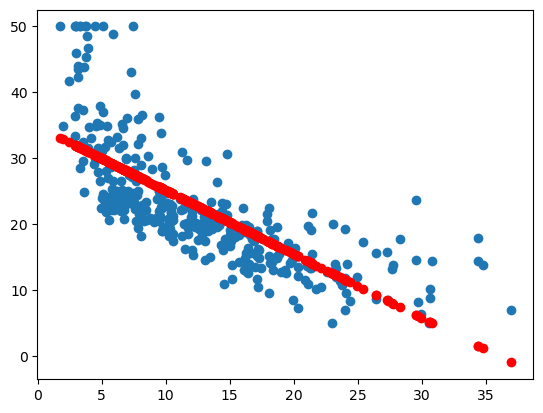

In [66]:
# 확장전의 모습) 먼저 LSTAT 특성만 가지고 학습 시킨 후 예측을 어떻게 하는지 보기
model = LinearRegression()
model.fit(X_train[['LSTAT']], y_train)
pre = model.predict(X_train[['LSTAT']])

# 시각화 해보기
plt.scatter(X_train[['LSTAT']], y_train)
plt.scatter(X_train[['LSTAT']], pre, c='red')
plt.show()

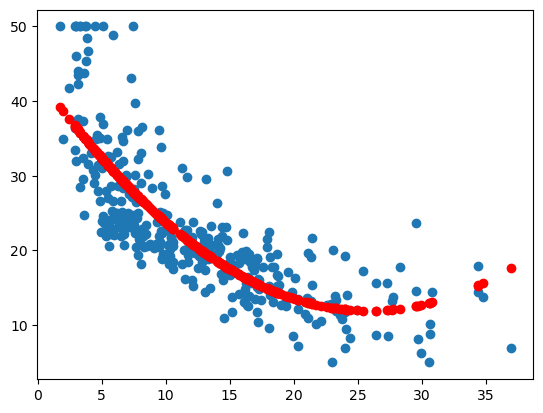

In [67]:
# 특성 확장 후) 원래 LSTAT 특성과 확장 LSTAT 특성을 가지고 학습시킨 후 예측을 어떻게 하는지 시각화
X_train['LSTAT X LSTAT'] = X_train['LSTAT'] * X_train['LSTAT']

model = LinearRegression()
model.fit(X_train[['LSTAT', 'LSTAT X LSTAT']], y_train)
pre = model.predict(X_train[['LSTAT', 'LSTAT X LSTAT']])

# 시각화 해보기
plt.scatter(X_train[['LSTAT']], y_train)
plt.scatter(X_train[['LSTAT']], pre, c='red')
plt.show()

In [68]:
X_test['LSTAT x LSTAT'] = X_test["LSTAT"] * X_test["LSTAT"]

model = LinearRegression()
model.fit(X_train, y_train) # 문제 데이터에는 특성확장된 컬럼이 존재!
model.score(X_test, y_test) # 문제 데이터에는 특성확장된 컬럼이 존재!, R2_score

0.6978697736472479